# Example Time Series Charts

These examples show creating time series charts to identify outliers and see seasonal patterns in crime.

In [1]:
from crimepy import query, time
from crimepy.cdcplot import plt
import pandas as pd

# Chicago Robberies
chic_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.json'
parm = "?$where=date>'2015-01-01'&primary_type='ROBBERY'"
res_rob = query.query_socrata(chic_url,add_params=parm)
res_rob['ReportDate'] = pd.to_datetime(res_rob['date'].str[:10])
res_rob.head(2).T

d:\Python\envs\pyca\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.cityofchicago.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Python\envs\pyca\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.cityofchicago.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,0,1
id,12131221,12729745
case_number,JD327000,JF279458
date,2020-08-10T09:45:00.000,2022-06-14T14:47:00.000
block,015XX N DAMEN AVE,035XX N CENTRAL AVE
iucr,0326,0340
primary_type,ROBBERY,ROBBERY
description,AGGRAVATED VEHICULAR HIJACKING,ATTEMPT STRONG ARM - NO WEAPON
location_description,STREET,BANK
arrest,True,True
domestic,False,False


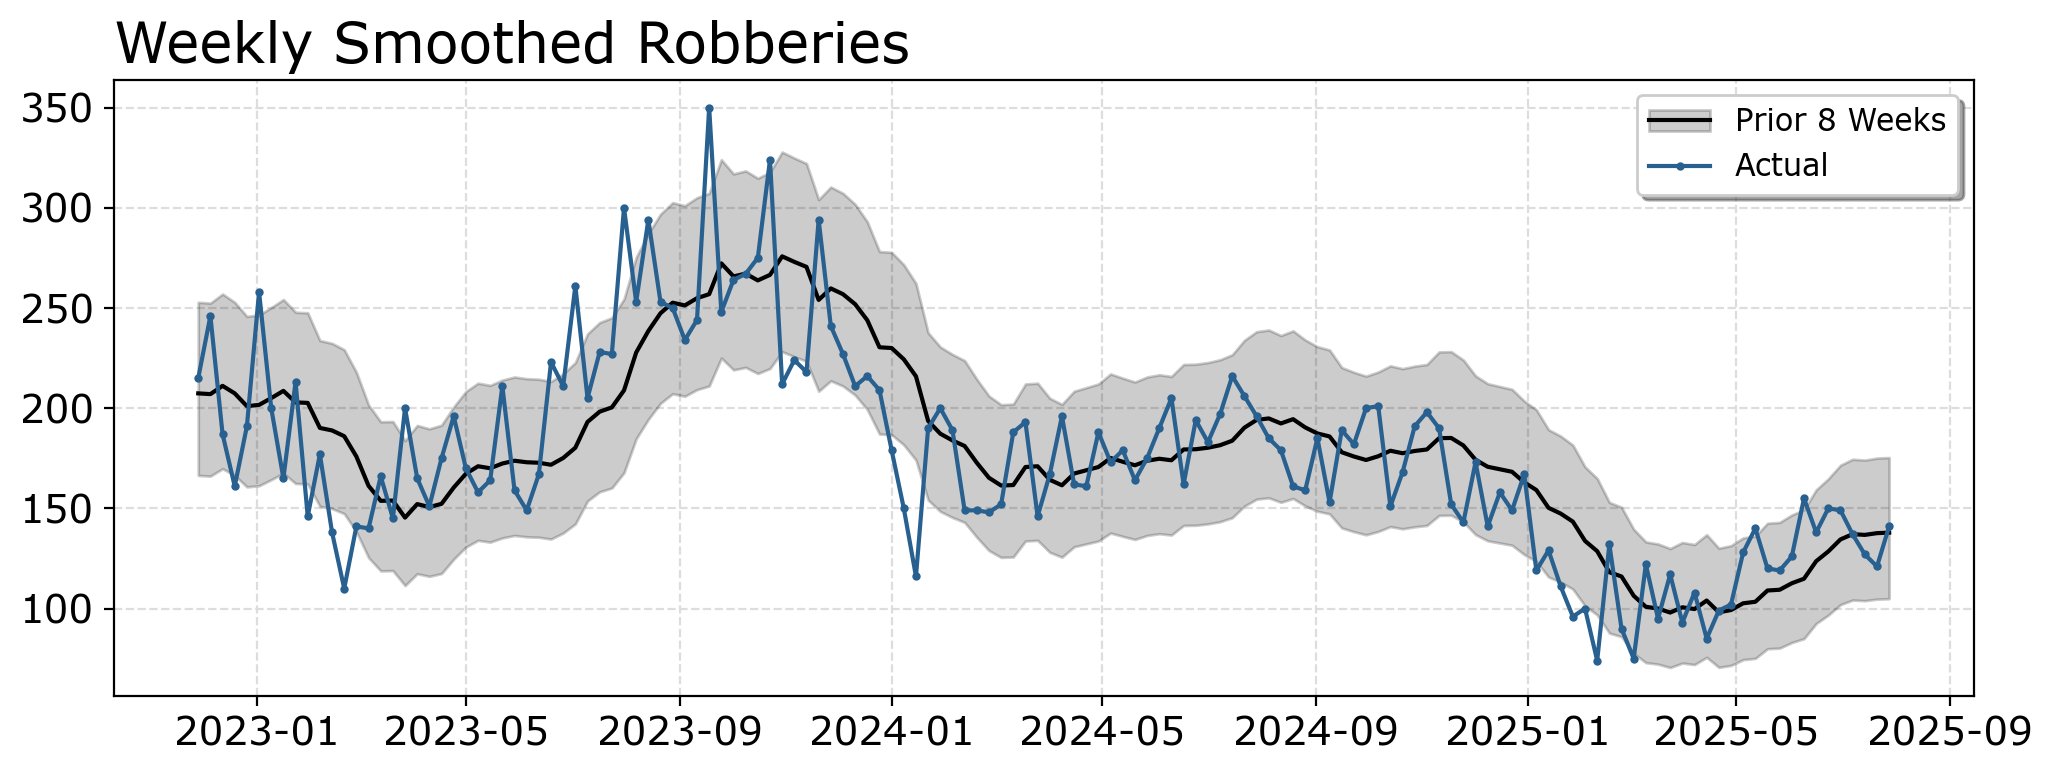

In [2]:
# Week Charts
week_rob = time.weekly_data(res_rob,'ReportDate')
time.week_chart(week_rob,title='Weekly Smoothed Robberies',legend_loc='upper right',
                max_weeks=140)

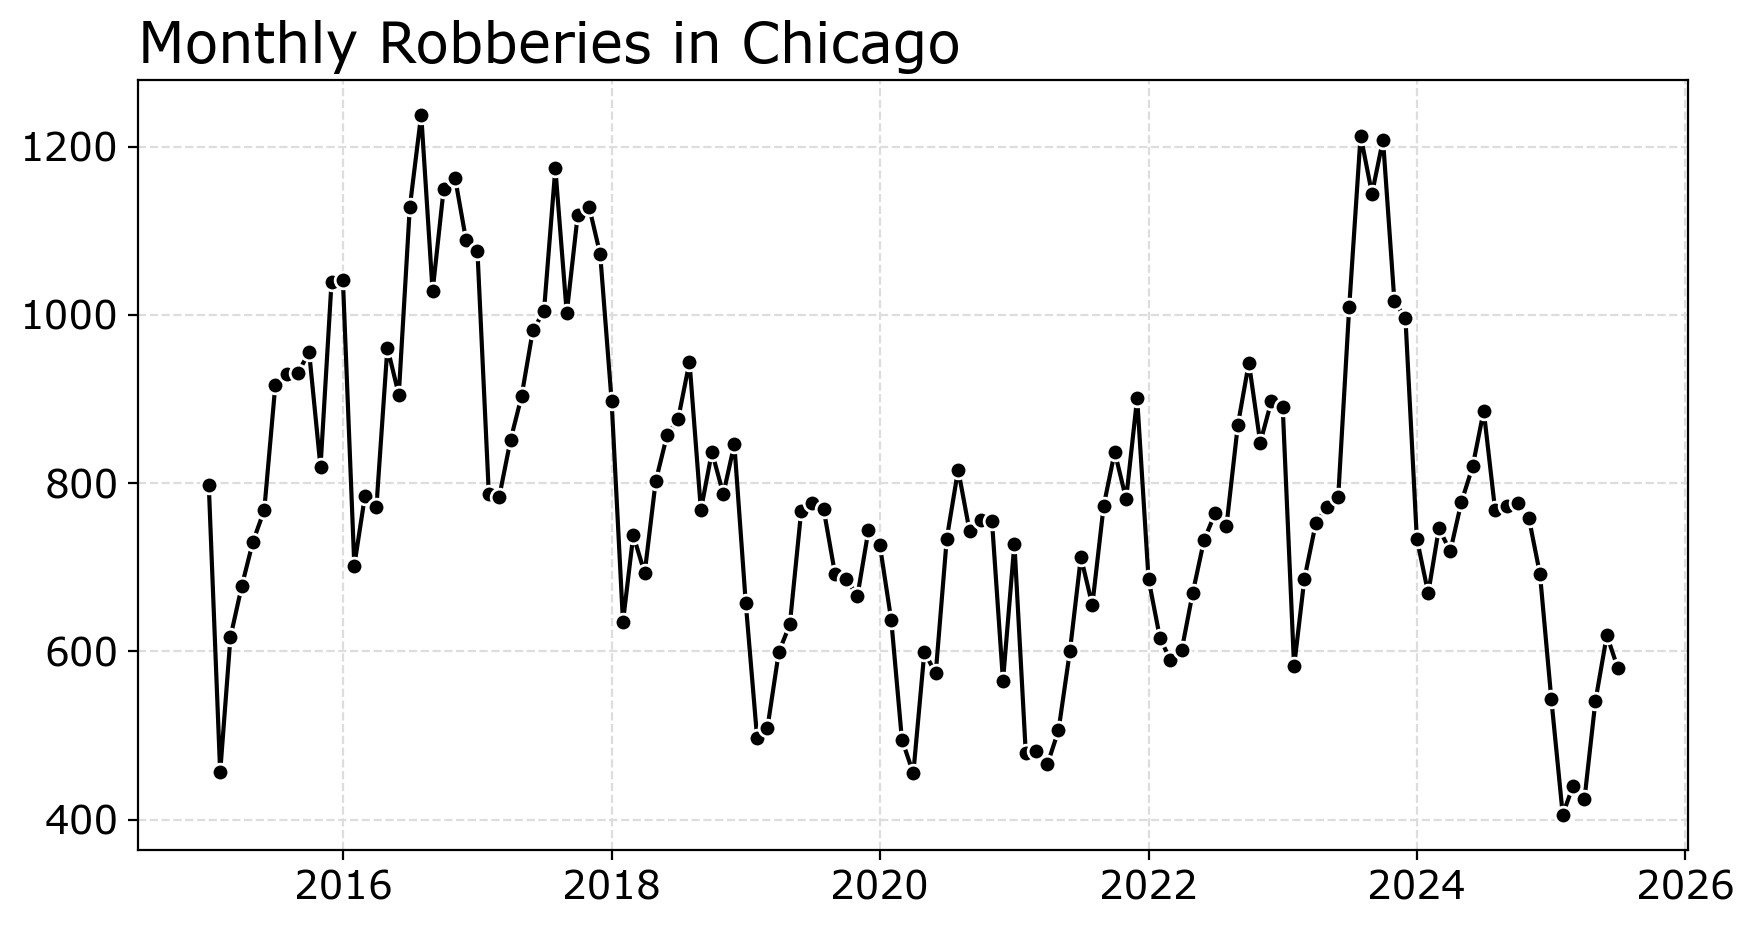

In [3]:
# Monthly chart
month_rob = time.monthly_data(res_rob,'ReportDate')
time.month_chart(month_rob,title='Monthly Robberies in Chicago')

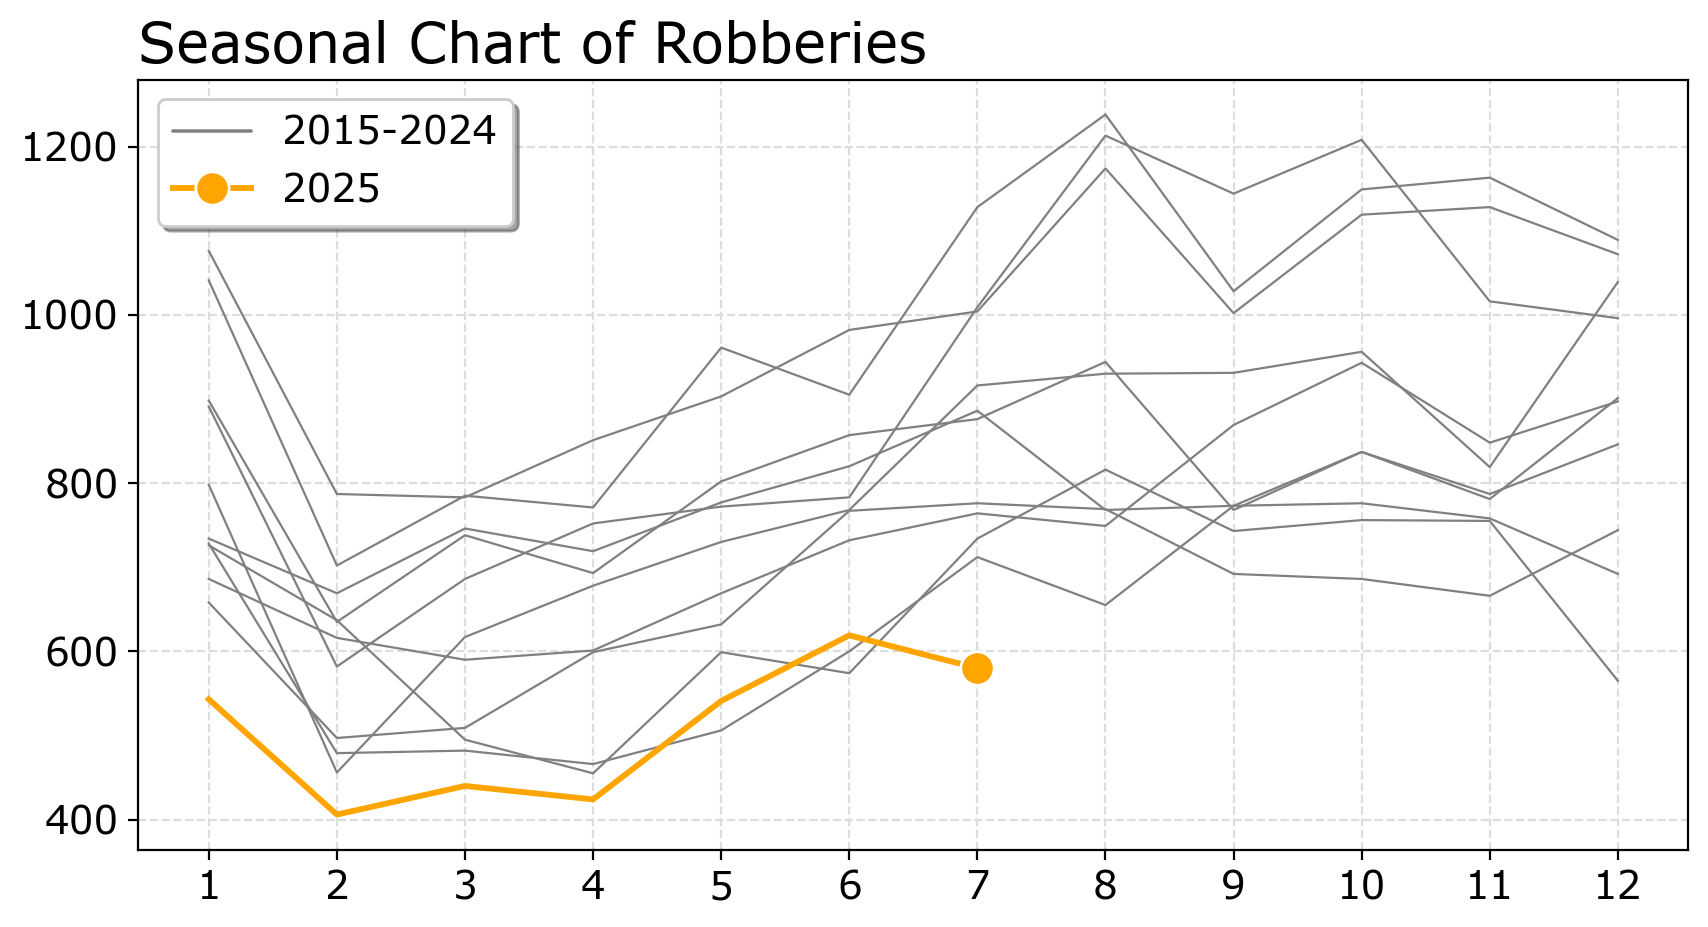

In [4]:
# Seasonal chart
time.seas_chart(month_rob,title='Seasonal Chart of Robberies')

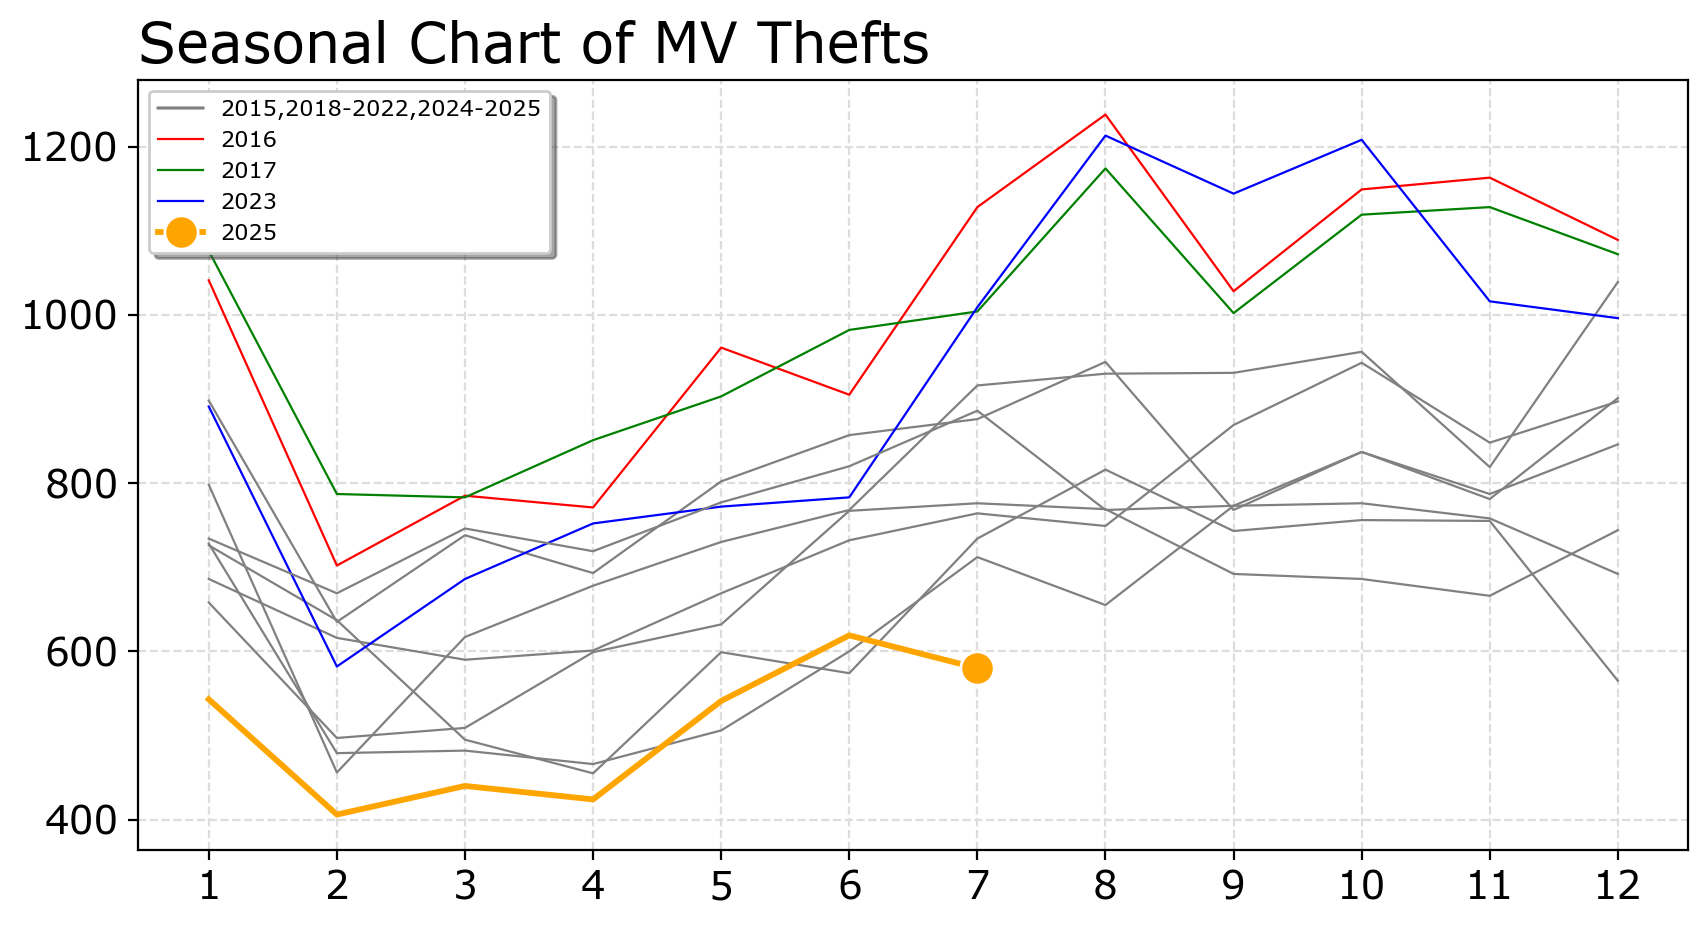

In [5]:
# Can highlight certain years
# legend gets a bit messy
high_years = {2023: 'blue', 2016: 'red', 2017: 'green'}

time.seas_chart(month_rob,title='Seasonal Chart of MV Thefts',
                year_colors=high_years,leg_kwargs={'prop': {'size':8}})

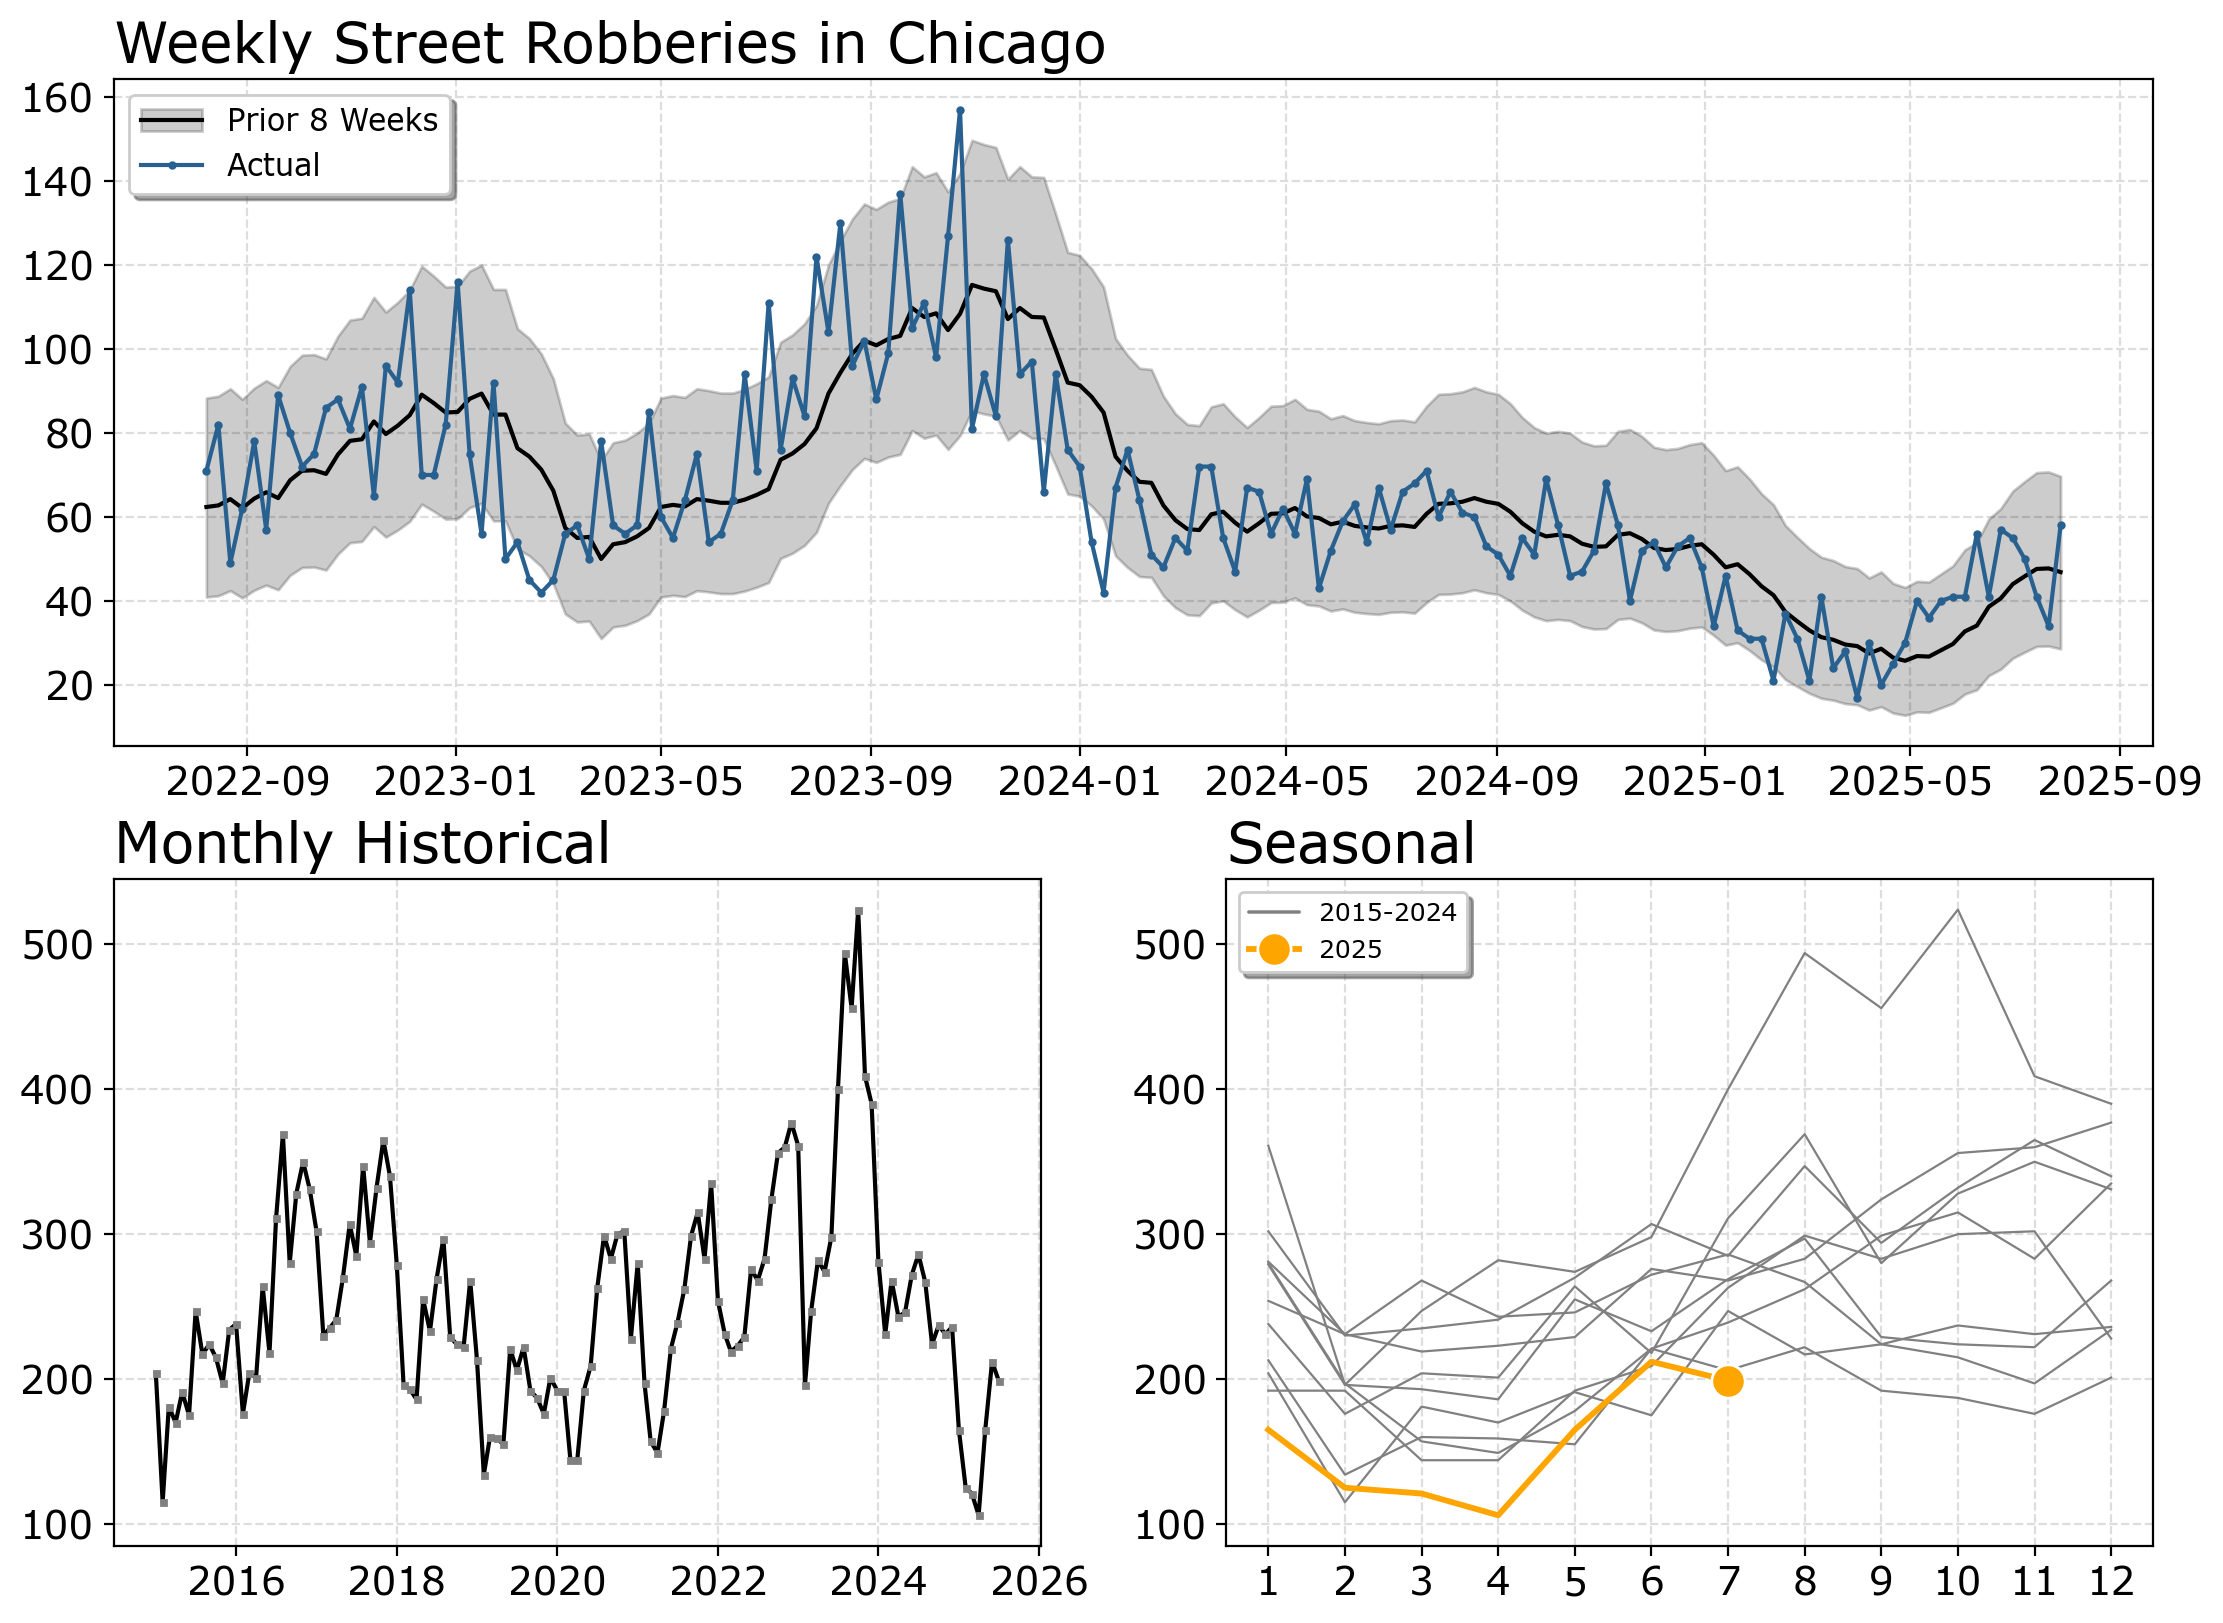

In [6]:
# Combining all of the charts together!
# Lets just look at street robberies
street_rob = res_rob[res_rob['location_description'] == 'STREET'].copy()
month_data = time.monthly_data(street_rob,'ReportDate')
weekly_data = time.weekly_data(street_rob,'ReportDate')

mos = [['A','A'],['B','C']]
fig, ax = plt.subplot_mosaic(mos,figsize=(11,8),layout="constrained")
li_kw = {'color':'k','marker':'s','markerfacecolor': 'grey','markeredgecolor': 'grey','markersize':1.8}
a = time.month_chart(data=month_data,ax=ax['B'],title='Monthly Historical',file='return',annotate='',line_kwargs=li_kw)

leg_kwargs= {'prop': {'size': 9}}
a = time.seas_chart(data=month_data,ax=ax['C'],title='Seasonal',file='return',annotate='',leg_kwargs=leg_kwargs)
a = time.week_chart(data=weekly_data,ax=ax['A'],title='Weekly Street Robberies in Chicago',max_weeks=52*3,legend_loc='upper left',file='return',annotate='')